# Basic points within radius

In [1]:
import os, glob
import math
import pandas as pd
import numpy as np
from multiprocessing import Pool

### Distance calculation with Earth shape constraint

In [2]:
def haversine_dist(ori, dest):
    lat1, lon1 = ori
    lat2, lon2 = dest
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    dist = radius * c

    return dist

### Read Input file

In [3]:
latlong_df = pd.read_excel('input_file/latlong_data.xlsx', header=1, index_col=0)

In [4]:
latlong_df

,group,site,lat,long
1,A,A1,3.165662,101.648677
2,A,A2,3.151360,101.615948
3,A,A3,3.118985,101.675336
4,A,A4,3.129969,101.670699
5,A,A5,3.142710,101.667520
6,B,B1,3.166728,101.648859
7,B,B2,3.164158,101.647359
8,B,B3,3.166741,101.648638
9,B,B4,3.166602,101.652558
10,B,B5,3.170830,101.659055


### Data preparation
Combine site name and latitude & longitude

In [5]:
latlong_df['site_latlong'] = list(zip(latlong_df['site'],list(zip(latlong_df['lat'],latlong_df['long']))))

In [6]:
latlong_df

,group,site,lat,long,site_latlong
1,A,A1,3.165662,101.648677,"(A1, (3.165662, 101.648677))"
2,A,A2,3.151360,101.615948,"(A2, (3.15136, 101.615948))"
3,A,A3,3.118985,101.675336,"(A3, (3.118985, 101.675336))"
4,A,A4,3.129969,101.670699,"(A4, (3.129969, 101.670699))"
5,A,A5,3.142710,101.667520,"(A5, (3.14271, 101.66752))"
6,B,B1,3.166728,101.648859,"(B1, (3.166728, 101.648859))"
7,B,B2,3.164158,101.647359,"(B2, (3.164158, 101.647359))"
8,B,B3,3.166741,101.648638,"(B3, (3.166741, 101.648638))"
9,B,B4,3.166602,101.652558,"(B4, (3.166602, 101.652558))"
10,B,B5,3.170830,101.659055,"(B5, (3.17083, 101.659055))"


### Visualization of point by group

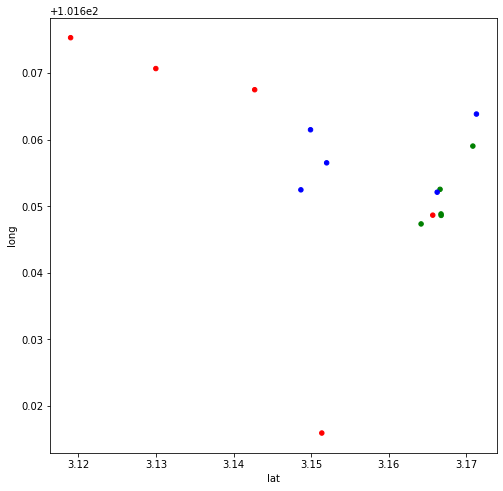

In [7]:
import matplotlib.pyplot as plt

colors = {'A':'red', 'B':'green', 'C':'blue'}

fig = latlong_df.plot.scatter(x='lat', y='long', figsize=(8, 8), c=latlong_df['group'].map(colors)).get_figure()

In [8]:
fig.savefig('image/plot_points.jpg')

### Main function 
Calculate the distance from a point to points of different group

In [9]:
def site_within(group, site_latlong):
    radius = 10 #km, radius constraint
    other_sites = latlong_df['site_latlong'].loc[latlong_df['group'] != group].tolist()
    sites = site_latlong[0]
    latlong = site_latlong[1]
    distance = [haversine_dist(latlong, x[1]) for x in other_sites]
    distance_within = [x for x in distance if x< radius]
    site_km = list(zip([x[0] for x in other_sites], distance_within))
    site_km = sorted(site_km, key=lambda tup: tup[1])
    return site_km

In [10]:
%%time
latlong_df['nearest'] = latlong_df.apply(lambda x: site_within(x['group'], x['site_latlong']), axis=1)

CPU times: user 8.66 ms, sys: 393 µs, total: 9.05 ms
Wall time: 8.51 ms


In [11]:
latlong_df

,group,site,lat,long,site_latlong,nearest
1,A,A1,3.165662,101.648677,"(A1, (3.165662, 101.648677))","[(B3, 0.1200574336676934), (B1, 0.120243776815..."
2,A,A2,3.151360,101.615948,"(A2, (3.15136, 101.615948))","[(B2, 3.766613581343238), (B3, 4.0122204133754..."
3,A,A3,3.118985,101.675336,"(A3, (3.118985, 101.675336))","[(C5, 3.7656073794037517), (C3, 4.162891202116..."
4,A,A4,3.129969,101.670699,"(A4, (3.129969, 101.670699))","[(C5, 2.4406209670515424), (C3, 2.900390941365..."
5,A,A5,3.142710,101.667520,"(A5, (3.14271, 101.66752))","[(C5, 1.0422331356843104), (C4, 1.596991987084..."
6,B,B1,3.166728,101.648859,"(B1, (3.166728, 101.648859))","[(A1, 0.12024377681503264), (C1, 0.36692181064..."
7,B,B2,3.164158,101.647359,"(B2, (3.164158, 101.647359))","[(A1, 0.2222186860319872), (C1, 0.577231206875..."
8,B,B3,3.166741,101.648638,"(B3, (3.166741, 101.648638))","[(A1, 0.1200574336676934), (C1, 0.391402097193..."
9,B,B4,3.166602,101.652558,"(B4, (3.166602, 101.652558))","[(C1, 0.06333608770282707), (A1, 0.44338499682..."
10,B,B5,3.170830,101.659055,"(B5, (3.17083, 101.659055))","[(C2, 0.536483252995675), (C1, 0.9238174732125..."


In [ ]:
latlong_df.to_csv('output/result.csv')

### Speed UP
Use multiprocessing for huge dataset

In [12]:
def parallelize_dataframe(df, func, n_cores=4):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

In [13]:
def nearest(latlong_df):
    latlong_df['nearest'] = latlong_df.apply(lambda x: site_within(x['group'], x['site_latlong']), axis=1)
    return latlong_df

In [14]:
%%time
final_df = parallelize_dataframe(latlong_df, nearest)

CPU times: user 11.8 ms, sys: 16.3 ms, total: 28.1 ms
Wall time: 121 ms


In [15]:
final_df

,group,site,lat,long,site_latlong,nearest
1,A,A1,3.165662,101.648677,"(A1, (3.165662, 101.648677))","[(B3, 0.1200574336676934), (B1, 0.120243776815..."
2,A,A2,3.151360,101.615948,"(A2, (3.15136, 101.615948))","[(B2, 3.766613581343238), (B3, 4.0122204133754..."
3,A,A3,3.118985,101.675336,"(A3, (3.118985, 101.675336))","[(C5, 3.7656073794037517), (C3, 4.162891202116..."
4,A,A4,3.129969,101.670699,"(A4, (3.129969, 101.670699))","[(C5, 2.4406209670515424), (C3, 2.900390941365..."
5,A,A5,3.142710,101.667520,"(A5, (3.14271, 101.66752))","[(C5, 1.0422331356843104), (C4, 1.596991987084..."
6,B,B1,3.166728,101.648859,"(B1, (3.166728, 101.648859))","[(A1, 0.12024377681503264), (C1, 0.36692181064..."
7,B,B2,3.164158,101.647359,"(B2, (3.164158, 101.647359))","[(A1, 0.2222186860319872), (C1, 0.577231206875..."
8,B,B3,3.166741,101.648638,"(B3, (3.166741, 101.648638))","[(A1, 0.1200574336676934), (C1, 0.391402097193..."
9,B,B4,3.166602,101.652558,"(B4, (3.166602, 101.652558))","[(C1, 0.06333608770282707), (A1, 0.44338499682..."
10,B,B5,3.170830,101.659055,"(B5, (3.17083, 101.659055))","[(C2, 0.536483252995675), (C1, 0.9238174732125..."
